In [1]:
# !pip install influxdb-client

In [2]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [3]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org,
    timeout=30_000
)
query_api = client.query_api()

{'bucket': 'Temporary', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [4]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-09-25T22:00:00Z, stop: 2023-09-25T22:50:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 154)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_standard)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
214143   125970.0      46.0             0.0            0.0       200.0   
214144   125970.0      47.0             0.0            0.0       200.0   
214145   125970.0      48.0             0.0            0.0       200.0   
214146   125970.0      49.0             0.0            0.0       200.0   
214147   125970.0      50.0             0.0            0.0       200.0   

          powerTotal  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [5]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-09-25T22:00:00Z, stop: 2023-09-25T22:50:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 155)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_heft)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
214140   125970.0      46.0             0.0            0.0       200.0   
214141   125970.0      47.0             0.0            0.0       200.0   
214142   125970.0      48.0             0.0            0.0       200.0   
214143   125970.0      49.0             0.0            0.0       200.0   
214144   125970.0      50.0             0.0            0.0       200.0   

          powerTotal  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [6]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-09-25T22:00:00Z, stop: 2023-09-25T22:50:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 156)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_random)

        timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0            30.0       0.0             1.0           24.0       350.0  \
1            30.0       1.0             1.0           24.0       350.0   
2            30.0       2.0             1.0           24.0       350.0   
3            30.0       3.0             1.0           24.0       350.0   
4            30.0       4.0             1.0           24.0       350.0   
...           ...       ...             ...            ...         ...   
211926   124680.0      25.0             0.0            0.0       200.0   
211927   124680.0      26.0             0.0            0.0       200.0   
211928   124680.0      27.0             0.0            0.0       200.0   
211929   124680.0      28.0             0.0            0.0       200.0   
211930   124680.0      29.0             0.0            0.0       200.0   

          powerTotal  
0       1.019993e+04  
1       2.039985e+04  
2       3.059978e+04  
3       4.079971e+0

In [7]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
# print(df_minmin)

In [8]:
df_total_power_standard = df_standard[['timestamp','serverId','powerTotal']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 50]
print(df_total_power_standard)

        timestamp  serverId    powerTotal
50           30.0        50  5.201963e+05
101          60.0        50  1.055696e+06
152          90.0        50  1.591196e+06
203         120.0        50  2.126696e+06
254         150.0        50  2.662196e+06
...           ...       ...           ...
213943   125850.0        50  1.291414e+09
213994   125880.0        50  1.291720e+09
214045   125910.0        50  1.292026e+09
214096   125940.0        50  1.292332e+09
214147   125970.0        50  1.292638e+09

[4199 rows x 3 columns]


/tmp/ipykernel_32999/3045806056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [9]:
df_total_power_heft = df_heft[['timestamp','serverId','powerTotal']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 50]
print(df_total_power_heft)

        timestamp  serverId    powerTotal
50           30.0        50  5.201963e+05
101          60.0        50  1.055696e+06
152          90.0        50  1.591196e+06
203         120.0        50  2.126696e+06
254         150.0        50  2.662196e+06
...           ...       ...           ...
213940   125850.0        50  1.291614e+09
213991   125880.0        50  1.291920e+09
214042   125910.0        50  1.292226e+09
214093   125940.0        50  1.292532e+09
214144   125970.0        50  1.292838e+09

[4199 rows x 3 columns]


/tmp/ipykernel_32999/4099335833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [10]:
df_total_power_random = df_random[['timestamp','serverId','powerTotal']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 50]
print(df_total_power_random)

        timestamp  serverId    powerTotal
50           30.0        50  5.201963e+05
101          60.0        50  1.055696e+06
152          90.0        50  1.591196e+06
203         120.0        50  2.126696e+06
254         150.0        50  2.662196e+06
...           ...       ...           ...
211696   124530.0        50  1.277706e+09
211747   124560.0        50  1.278012e+09
211798   124590.0        50  1.278318e+09
211849   124620.0        50  1.278624e+09
211900   124650.0        50  1.278930e+09

[4155 rows x 3 columns]


/tmp/ipykernel_32999/713471063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [11]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','powerTotal']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

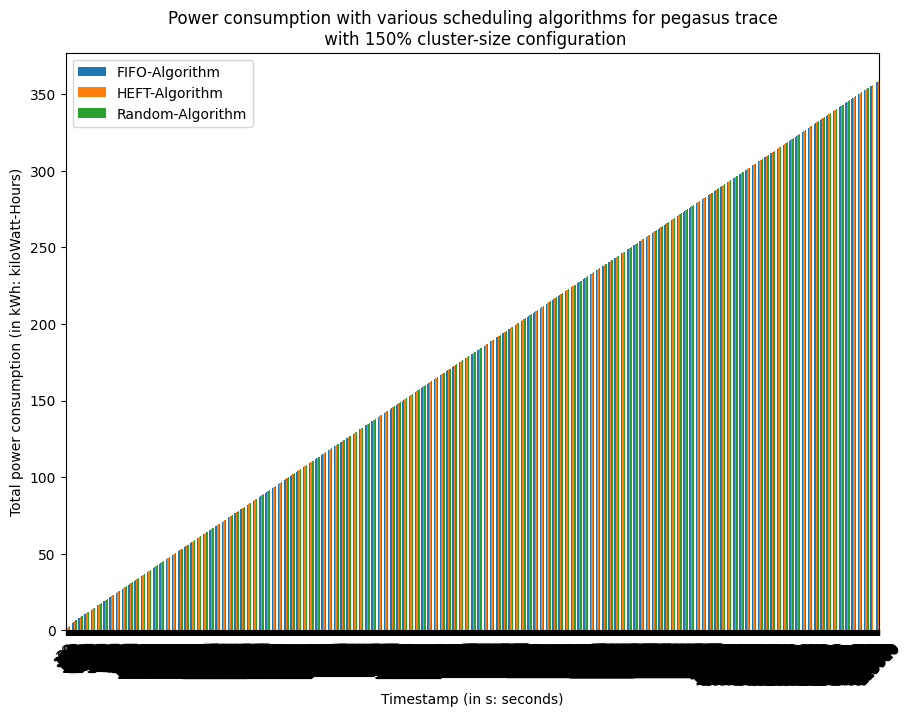

In [12]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['host_id'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["powerTotal"] = df_merged["powerTotal"]/(1000*3600)
df_merged["powerTotal_y"] = df_merged["powerTotal_y"]/(1000*3600)
df_merged["powerTotal_z"] = df_merged["powerTotal_z"]/(1000*3600)
# df_merged["powerTotal_w"] = df_merged["powerTotal_w"]/1000000
df_merged.rename(columns={'powerTotal': 'FIFO-Algorithm', 'powerTotal_y': 'HEFT-Algorithm', 'powerTotal_z': 'Random-Algorithm'}, inplace=True) #, 'powerTotal_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# print(df_merged)
# Create a bar plot of the merged dataframe, grouped by timestamp
fig, ax = plt.subplots()
df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms for pegasus trace\n with 150% cluster-size configuration', width=.75)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('Total power consumption (in kWh: kiloWatt-Hours)')
plt.xlabel('Timestamp (in s: seconds)')
fig.set_size_inches(10.5, 7.5)
fig.savefig('multiple_hosts_energy_plotted_trace_pegasus_150.png', bbox_inches='tight')
plt.show()

In [13]:
# df_merged["powerTotal"] = df_merged["powerTotal"]/(1000*3600)
# df_merged["powerTotal_y"] = df_merged["powerTotal_y"]/(1000*3600)
# df_merged["powerTotal_z"] = df_merged["powerTotal_z"]/(1000*3600)
print(df_merged)

      timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0            30        0.144499        0.144499          0.144499
1            60        0.293249        0.293249          0.293249
2            90        0.441999        0.441999          0.441999
3           120        0.590749        0.590749          0.590749
4           150        0.739499        0.739499          0.739499
...         ...             ...             ...               ...
4194     125850      358.726179      358.781646          0.000000
4195     125880      358.811179      358.866646          0.000000
4196     125910      358.896179      358.951646          0.000000
4197     125940      358.981180      359.036646          0.000000
4198     125970      359.066180      359.121646          0.000000

[4199 rows x 4 columns]


In [14]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 359.0661796595586 kWh
Total energy consumption in HEFT algorithm for executing given trace - 359.12164593596145 kWh
Total energy consumption in Random algorithm for executing given trace - 355.2582851681656 kWh


In [15]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[359.0661796595586, 359.12164593596145, 355.2582851681656]


In [16]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for pegasus workload trace and 150% cluster-size configuration.")


Resource scheduling algorithm Random is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm FIFO records 1.07187% worse energy-efficiency than the scheduling algorithm Random for pegasus workload trace and 150% cluster-size configuration.
Scheduling algorithm HEFT records 1.08748% worse energy-efficiency than the scheduling algorithm Random for pegasus workload trace and 150% cluster-size configuration.
